# Exploring CancerLocator Alphas and Betas

We will be using the sample data from the CancerLocator tool.

We have printed out the relevant data into a file ```INPUT_FILE``` and we will use this file to explore the alphas and betas.

In [2]:
INPUT_FILE = '../../output/raw_output/cancerLocatorAlphaBetas.txt'
lines  = []

with open(INPUT_FILE, 'r') as f:
    lines = f.readlines()

lines = [line.strip("\n") for line in lines]

This file contains 5 Methylation models representing 5 different tissues. Normal tissue and 4 different cancer tissues.

Let's check this models!

In [3]:
# Get the model names: they are in lines with the format "<model_name>		#Sample		Alpha		Beta"
model_names = [line.split('\t')[0] for line in lines if line.endswith("\t\t#Sample\t\tAlpha\t\tBeta")]

for idx, model_name in enumerate(model_names):
    print(f"Model{idx + 1}. {model_name}")

Model1. plasma_background
Model2. lusc
Model3. luad
Model4. lihc
Model5. brca


For each model, we have a list of lines with #NumLine, Alpha, Beta

Let's get the alpha and beta values for each model! 

In [4]:
current_model = None
current_alphas_betas = []

models = {}

for line in lines:

  ## If new model is found
  if line.endswith("\t\t#Sample\t\tAlpha\t\tBeta"):

    ## Save the previous model
    if current_model:
      models[current_model] = current_alpha_betas

    ## Start a new model
    current_model = line.split('\t')[0] # Get current model
    current_alpha_betas = []

  ## If line is an alpha beta line, read it  
  if line.startswith("\t\t"):
    current_alpha_betas.append( ( float(line.split('\t')[4]) , float(line.split('\t')[6]) ) )

## Save the last model
models[current_model] = current_alpha_betas

Now that we have the alpha and beta values for each model, we can plot them and see how they differ from each other.

Let's print some basic statistics for each model and plot the alphas and betas for each model.

In [5]:
# Print how many Infs and Nans are in 'plasma_background' model
print("plasma_background")
plasma_background = models['plasma_background']
print(float('inf'))
print(f"Number of Infs in alpha: {sum([1 for alpha, beta in plasma_background if alpha == float('inf')])}")
print(f"Number of Infs in beta: {sum([1 for alpha, beta in plasma_background if beta == float('inf')])}")
print(f"Number of Nans in alpha: {sum([1 for alpha, beta in plasma_background if alpha != alpha])}")
print(f"Number of Nans in beta: {sum([1 for alpha, beta in plasma_background if beta != beta])}")


plasma_background
inf
Number of Infs in alpha: 2
Number of Infs in beta: 2
Number of Nans in alpha: 55
Number of Nans in beta: 55


Model: plasma_background
Mean Alpha: 1.9498455995882657e+28
Mean Beta: 2.2093823983530626e+28
Median Alpha: 6.9837
Median Beta: 20.0789
Standard Deviation Alpha: 8.594816778919795e+29
Standard Deviation Beta: 9.738841327961956e+29
Variance Alpha: 7.3870875463201235e+59
Variance Beta: 9.484503041121978e+59
Max Alpha: 3.78855e+31
Max Beta: 4.29283e+31
Min Alpha: 0.010004
Min Beta: 0.377684
Alpha 95% CI: 0.05804723 - 124.53200000000002
Beta 95% CI: 1.8806915000000002 - 227.04360000000017



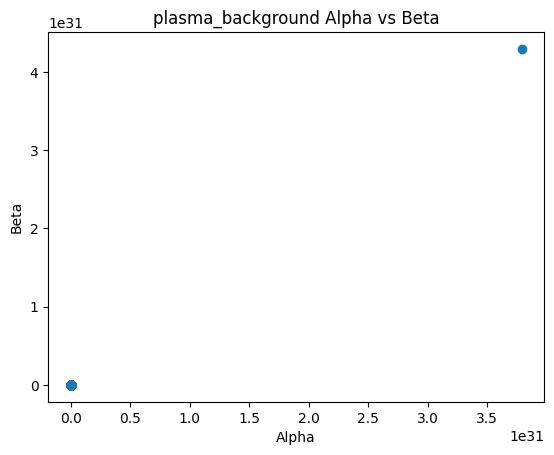

Model: lusc
Mean Alpha: 23.061546938127975
Mean Beta: 298.25612180010575
Median Alpha: 10.2686
Median Beta: 10.4576
Standard Deviation Alpha: 37.09369116982633
Standard Deviation Beta: 630.8193965080234
Variance Alpha: 1375.9419246024515
Variance Beta: 397933.11101074686
Max Alpha: 542.059
Max Beta: 4329.9
Min Alpha: 0.239286
Min Beta: 0.21161
Alpha 95% CI: 0.6897530000000001 - 106.5735
Beta 95% CI: 1.022535 - 2283.075



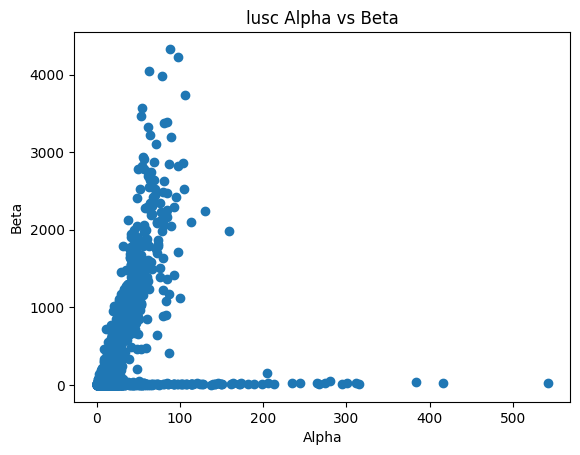

Model: luad
Mean Alpha: 40.50462347329455
Mean Beta: 232.66190809360128
Median Alpha: 12.7157
Median Beta: 13.3295
Standard Deviation Alpha: 107.4775502257519
Standard Deviation Beta: 487.48521695157933
Variance Alpha: 11551.423802529021
Variance Beta: 237641.8367463284
Max Alpha: 2843.2
Max Beta: 3351.05
Min Alpha: 0.194572
Min Beta: 0.132512
Alpha 95% CI: 0.73295725 - 292.12925
Beta 95% CI: 1.351585 - 1813.77



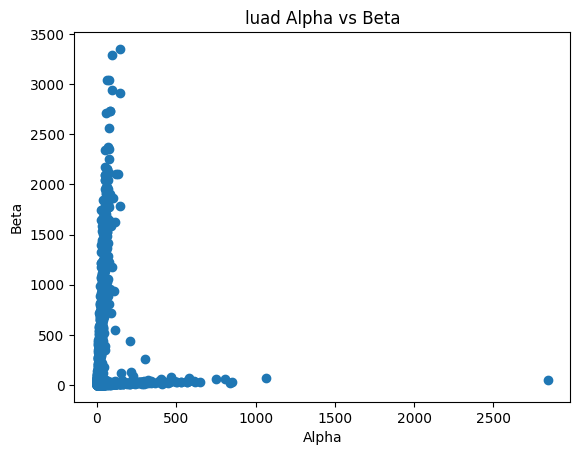

Model: lihc
Mean Alpha: 27.36314505129561
Mean Beta: 215.57361238656796
Median Alpha: 6.22058
Median Beta: 7.50503
Standard Deviation Alpha: 65.0186077979797
Standard Deviation Beta: 532.9480606127349
Variance Alpha: 4227.419359987506
Variance Beta: 284033.63531087537
Max Alpha: 830.379
Max Beta: 4254.95
Min Alpha: 0.147675
Min Beta: 0.13702
Alpha 95% CI: 0.59384425 - 190.04775
Beta 95% CI: 0.961302 - 1992.365



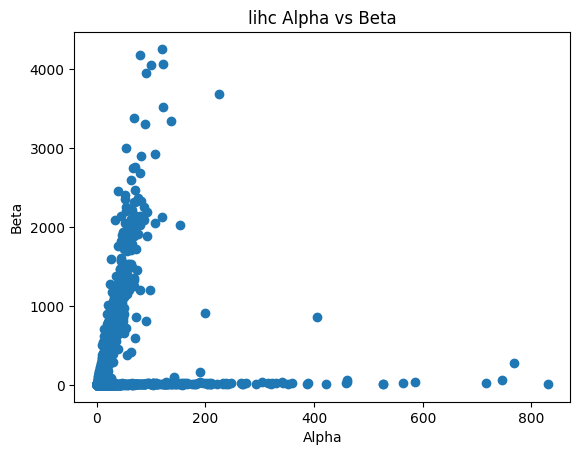

Model: brca
Mean Alpha: 30.55572558593337
Mean Beta: 110.80932252406134
Median Alpha: 8.88406
Median Beta: 9.80543
Standard Deviation Alpha: 72.65282156071177
Standard Deviation Beta: 244.3330144824494
Variance Alpha: 5278.432480732625
Variance Beta: 59698.62196608084
Max Alpha: 873.452
Max Beta: 3416.44
Min Alpha: 0.168566
Min Beta: 0.090343
Alpha 95% CI: 0.544431 - 249.63725
Beta 95% CI: 1.3775075 - 824.102



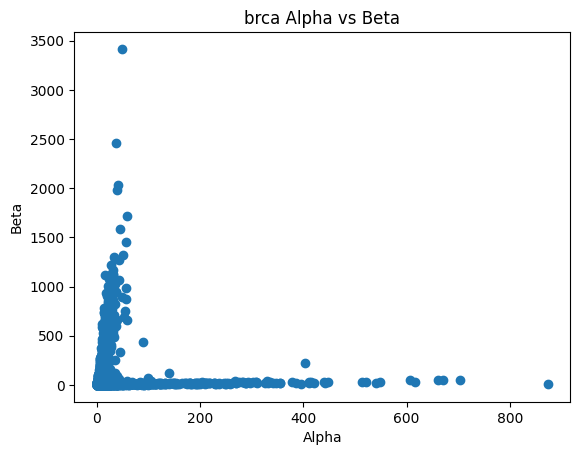

In [6]:
import statistics
import numpy as np
import matplotlib.pyplot as plt

for model_name, alphas_betas in models.items():
    old_alphas, old_betas = zip(*alphas_betas)
    
    ## Filter NaNs from alphas y betas and Inf 
    alphas = [alpha for alpha in old_alphas if not np.isnan(alpha) and alpha != float('inf')]
    betas = [beta for beta in old_betas if not np.isnan(beta) and beta != float('inf')]

    print(f"Model: {model_name}")
    #print(f"Alphas: {alphas}")
    #print(f"Betas: {betas}")
    print(f"Mean Alpha: {statistics.mean(alphas)}")
    print(f"Mean Beta: {statistics.mean(betas)}")
    print(f"Median Alpha: {statistics.median(alphas)}")
    print(f"Median Beta: {statistics.median(betas)}")
    print(f"Standard Deviation Alpha: {statistics.stdev(alphas)}")
    print(f"Standard Deviation Beta: {statistics.stdev(betas)}")
    print(f"Variance Alpha: {statistics.variance(alphas)}")
    print(f"Variance Beta: {statistics.variance(betas)}")
    print(f"Max Alpha: {max(alphas)}")
    print(f"Max Beta: {max(betas)}")
    print(f"Min Alpha: {min(alphas)}")
    print(f"Min Beta: {min(betas)}")
    print(f"Alpha 95% CI: {np.percentile(alphas, 2.5)} - {np.percentile(alphas, 97.5)}")
    print(f"Beta 95% CI: {np.percentile(betas, 2.5)} - {np.percentile(betas, 97.5)}")
    print("")

    plt.scatter(alphas, betas)
    plt.xlabel('Alpha')
    plt.ylabel('Beta')
    plt.title(f'{model_name} Alpha vs Beta')
    plt.show()

Now Print those statistics and plot the alphas and betas for all models combined.

Model: All
Mean Alpha: 29.41002559776983
Mean Beta: 181.25571892436355
Median Alpha: 9.34403
Median Beta: 11.339500000000001
Alpha 25th percentile: 3.32845
Beta 25th percentile: 4.5786575
Alpha 75th percentile: 29.177
Beta 75th percentile: 90.9213
Standard Deviation Alpha: 69.18266852457492
Standard Deviation Beta: 451.2102620845891
Variance Alpha: 4786.241624181209
Variance Beta: 203590.70061044357
Max Alpha: 2843.2
Max Beta: 4329.9
Min Alpha: 0.010004
Min Beta: 0.090343
Alpha 95% CI: 0.179675 - 190.690125
Beta 95% CI: 1.2166662499999998 - 1695.86625
Alpha 99% CI: 0.057701245 - 438.06827500000134
Beta 99% CI: 0.610376425 - 2723.591250000006



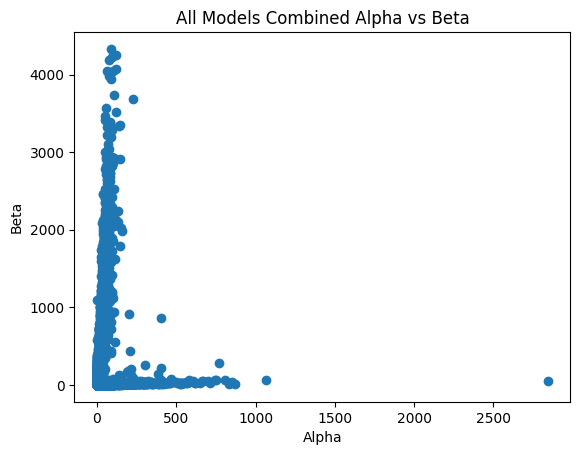

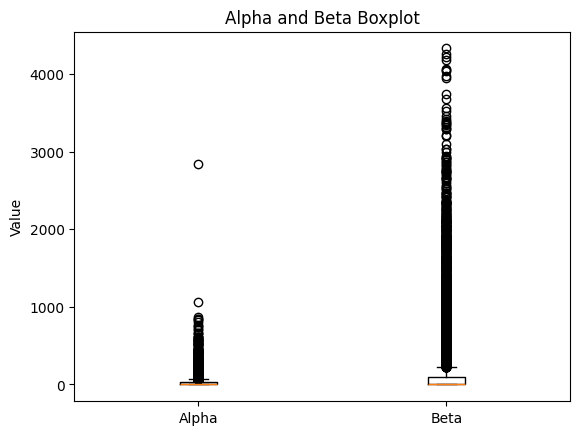

In [8]:
# Now Print those statistics and plot the alphas and betas for all models combined.
all_alphas = []
all_betas = []

for model_name, alphas_betas in models.items():
    old_alphas, old_betas = zip(*alphas_betas)
    
    ## Filter NaNs from alphas y betas and Inf 
    alphas = [alpha for alpha in old_alphas if not np.isnan(alpha) and alpha != float('inf') and alpha < 1e25]
    betas = [beta for beta in old_betas if not np.isnan(beta) and beta != float('inf') and beta < 1e25]

    all_alphas.extend(alphas)
    all_betas.extend(betas)

print(f"Model: All")
#print(f"Alphas: {all_alphas}")
#print(f"Betas: {all_betas}")
print(f"Mean Alpha: {statistics.mean(all_alphas)}")
print(f"Mean Beta: {statistics.mean(all_betas)}")
print(f"Median Alpha: {statistics.median(all_alphas)}")
print(f"Median Beta: {statistics.median(all_betas)}")
print (f"Alpha 25th percentile: {np.percentile(all_alphas, 25)}")
print (f"Beta 25th percentile: {np.percentile(all_betas, 25)}")
print (f"Alpha 75th percentile: {np.percentile(all_alphas, 75)}")
print (f"Beta 75th percentile: {np.percentile(all_betas, 75)}")
print(f"Standard Deviation Alpha: {statistics.stdev(all_alphas)}")
print(f"Standard Deviation Beta: {statistics.stdev(all_betas)}")
print(f"Variance Alpha: {statistics.variance(all_alphas)}")
print(f"Variance Beta: {statistics.variance(all_betas)}")
print(f"Max Alpha: {max(all_alphas)}")
print(f"Max Beta: {max(all_betas)}")
print(f"Min Alpha: {min(all_alphas)}")
print(f"Min Beta: {min(all_betas)}")
print(f"Alpha 95% CI: {np.percentile(all_alphas, 2.5)} - {np.percentile(all_alphas, 97.5)}")
print(f"Beta 95% CI: {np.percentile(all_betas, 2.5)} - {np.percentile(all_betas, 97.5)}")
print(f"Alpha 99% CI: {np.percentile(all_alphas, 0.5)} - {np.percentile(all_alphas, 99.5)}")
print(f"Beta 99% CI: {np.percentile(all_betas, 0.5)} - {np.percentile(all_betas, 99.5)}")
print("")
plt.scatter(all_alphas, all_betas)
plt.xlabel('Alpha')
plt.ylabel('Beta')
plt.title('All Models Combined Alpha vs Beta')
plt.show()

# Boxplot alphas and betas
plt.boxplot([all_alphas, all_betas], labels=['Alpha', 'Beta'])
plt.ylabel('Value')
plt.title('Alpha and Beta Boxplot')
plt.show()

